# Actividad: Estudio Comparativo entre Bagging y Random Forest

### Introducción Teórica
El método de Random Forest se fundamenta como una mejora sobre Bagging, principalmente por su capacidad para reducir la correlación entre los árboles individuales que componen el ensamblaje. Esto se logra mediante la introducción de un subconjunto aleatorio de predictores en cada división del árbol.

En esta actividad utilizaremos un **dataset balanceado (50/50)** diseñado para ser desafiante, pero no imposible de resolver. Esto nos permitirá comparar ambos algoritmos en un escenario realista donde sus diferencias mecánicas pueden manifestarse.

### Objetivo de la Actividad
Evaluar y comparar el rendimiento predictivo y la interpretación de los resultados de un modelo de Bagging frente a un modelo de Random Forest en un problema de clasificación con datos balanceados.


## 1. Preparación del Entorno y Carga de Datos
Use code with caution.
Importaremos las librerías necesarias y cargaremos nuestro dataset `prediccion_pobreza_peru_balanceada.csv`, antes de dividirlo para el entrenamiento y la prueba.

In [1]:
# 📚 Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# ⚙️ Configuraciones
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

# 💾 Carga y preparación de datos
df = pd.read_csv('prediccion_pobreza_peru_balanceada.csv')
X = df.drop('PobrezaMonetaria', axis=1)
y = df['PobrezaMonetaria']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("✅ Entorno y datos preparados.")


✅ Entorno y datos preparados.


## 2. Implementación del Modelo 1: Bagging Classifier
Use code with caution.
Nuestro primer modelo será un ensamblaje de Bagging. Dado que los datos están balanceados, no necesitamos usar `class_weight`.

In [2]:
# 🛠️ Preprocesador (común para ambos modelos)
numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ], remainder='passthrough')

# 🧱 Creación del pipeline para Bagging
bagging_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])

# 🚀 Entrenamiento
print("Entrenando el modelo Bagging...")
bagging_pipeline.fit(X_train, y_train)
print("✅ Modelo Bagging entrenado.")


Entrenando el modelo Bagging...
✅ Modelo Bagging entrenado.


## 3. Implementación del Modelo 2: Random Forest
Use code with caution.
Ahora, construiremos el modelo de Random Forest. La única diferencia con Bagging es que el algoritmo interno aplicará la selección aleatoria de características en cada división del árbol.

In [3]:
# 🧱 Creación del pipeline para Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])

# 🚀 Entrenamiento
print("Entrenando el modelo Random Forest...")
rf_pipeline.fit(X_train, y_train)
print("✅ Modelo Random Forest entrenado.")


Entrenando el modelo Random Forest...
✅ Modelo Random Forest entrenado.


## 4. Análisis Comparativo de Resultados
Use code with caution.
Con ambos modelos entrenados, ahora podemos comparar su rendimiento de manera directa.

### 4.1 Comparación de Métricas y Matrices de Confusión
Dado que las clases están balanceadas, la métrica de **`accuracy`** es un indicador fiable. Analizaremos también las matrices de confusión para entender los tipos de errores.

--- Evaluación del Modelo Bagging ---
              precision    recall  f1-score   support

No Pobre (0)       0.78      0.70      0.74       450
   Pobre (1)       0.73      0.80      0.77       450

    accuracy                           0.75       900
   macro avg       0.76      0.75      0.75       900
weighted avg       0.76      0.75      0.75       900



--- Evaluación del Modelo Random Forest ---
              precision    recall  f1-score   support

No Pobre (0)       0.79      0.71      0.75       450
   Pobre (1)       0.73      0.81      0.77       450

    accuracy                           0.76       900
   macro avg       0.76      0.76      0.76       900
weighted avg       0.76      0.76      0.76       900



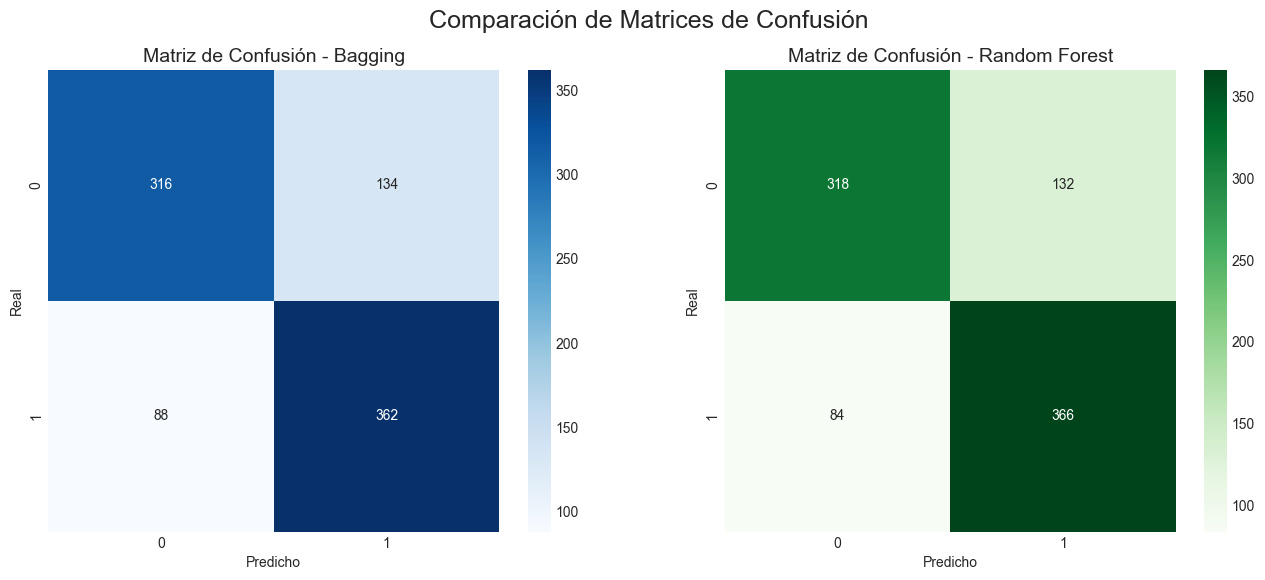

In [4]:
# 📊 Predicciones de ambos modelos
y_pred_bagging = bagging_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)

# Reportes de clasificación
print("--- Evaluación del Modelo Bagging ---")
print(classification_report(y_test, y_pred_bagging, target_names=['No Pobre (0)', 'Pobre (1)']))
print("\n" + "="*60 + "\n")
print("--- Evaluación del Modelo Random Forest ---")
print(classification_report(y_test, y_pred_rf, target_names=['No Pobre (0)', 'Pobre (1)']))

# Matrices de Confusión
cm_bagging = confusion_matrix(y_test, y_pred_bagging)
cm_rf = confusion_matrix(y_test, y_pred_rf)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(cm_bagging, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Matriz de Confusión - Bagging', fontsize=14)
ax1.set_xlabel('Predicho')
ax1.set_ylabel('Real')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=ax2)
ax2.set_title('Matriz de Confusión - Random Forest', fontsize=14)
ax2.set_xlabel('Predicho')
ax2.set_ylabel('Real')

plt.suptitle('Comparación de Matrices de Confusión', fontsize=18)
plt.show()


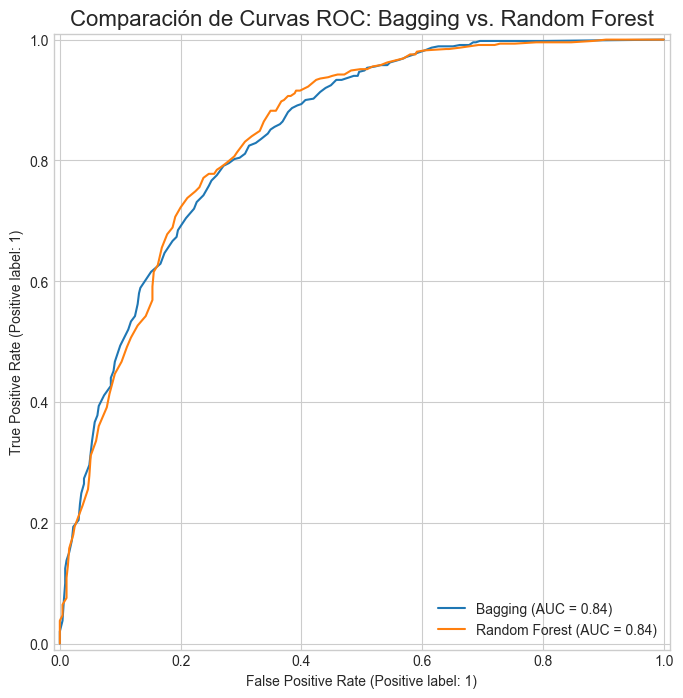

AUC del Modelo Bagging: 0.8382
AUC del Modelo Random Forest: 0.8397


In [5]:
# 📈 Comparación de Curvas ROC
fig, ax = plt.subplots(figsize=(10, 8))
RocCurveDisplay.from_estimator(bagging_pipeline, X_test, y_test, ax=ax, name='Bagging')
RocCurveDisplay.from_estimator(rf_pipeline, X_test, y_test, ax=ax, name='Random Forest')
ax.set_title('Comparación de Curvas ROC: Bagging vs. Random Forest', fontsize=16)
plt.show()

# Comparación numérica de AUC
auc_bagging = roc_auc_score(y_test, bagging_pipeline.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, rf_pipeline.predict_proba(X_test)[:, 1])
print(f"AUC del Modelo Bagging: {auc_bagging:.4f}")
print(f"AUC del Modelo Random Forest: {auc_rf:.4f}")


### 4.2 Comparación de Importancia de Variables
Use code with caution.
¿Coinciden ambos modelos en cuáles son las variables más predictivas? Crearemos una tabla para comparar el top 10 de cada uno.

In [6]:
# 📋 Función para obtener la importancia de variables en un DataFrame
def get_feature_importances(pipeline, top_n=10):
    feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
    
    if isinstance(pipeline.named_steps['classifier'], RandomForestClassifier):
        importances = pipeline.named_steps['classifier'].feature_importances_
    elif isinstance(pipeline.named_steps['classifier'], BaggingClassifier):
        importances = np.mean([tree.feature_importances_ for tree in pipeline.named_steps['classifier'].estimators_], axis=0)
    
    df_importance = pd.DataFrame({'Variable': feature_names, 'Importancia': importances})
    return df_importance.sort_values('Importancia', ascending=False).head(top_n).reset_index(drop=True)

# Obtener el top 10 de cada modelo
top10_bagging = get_feature_importances(bagging_pipeline)
top10_rf = get_feature_importances(rf_pipeline)

# Renombrar columnas para la tabla comparativa
top10_bagging.columns = ['Variable (Bagging)', 'Importancia (Bagging)']
top10_rf.columns = ['Variable (Random Forest)', 'Importancia (Random Forest)']

# Crear la tabla comparativa
comparison_table = pd.concat([top10_bagging, top10_rf], axis=1)

print("Tabla Comparativa del Top 10 de Variables más Importantes")
display(comparison_table)


Tabla Comparativa del Top 10 de Variables más Importantes


,Variable (Bagging),Importancia (Bagging),Variable (Random Forest),Importancia (Random Forest)
0,num__IngresoMensualHogar,0.398500,num__IngresoMensualHogar,0.267858
1,num__GastoMensualHogar,0.141630,num__GastoMensualHogar,0.220280
2,num__AniosEstudioJefeHogar,0.089662,num__AniosEstudioJefeHogar,0.077807
3,num__RatioDependencia,0.071778,num__RatioDependencia,0.065221
4,num__EdadJefeHogar,0.063904,num__MiembrosHogar,0.060234
5,num__MiembrosHogar,0.062874,num__EdadJefeHogar,0.060000
6,num__AccesoAguaPotable,0.009236,num__PoseeActivos,0.012872
7,num__PoseeActivos,0.008668,num__Hacinamiento,0.012726
8,cat__TipoEmpleo_Formal,0.008640,num__AccesoSaneamiento,0.011386
9,cat__NivelEducativoJefeHogar_Primaria,0.008346,cat__TipoEmpleo_Informal,0.011379


## 5. Análisis de Resultados y Discusión
Use code with caution.
Una vez implementados ambos modelos y visualizados los resultados, proceda a realizar un análisis comparativo respondiendo a las siguientes cuestiones.

### Cuestión 1: Rendimiento Predictivo
Compare la métrica de **`accuracy`** y el valor **`AUC`** obtenidos por ambos modelos. Analice también sus matrices de confusión. ¿Qué modelo comete menos errores en total? ¿La diferencia en el rendimiento es cuantitativamente significativa o marginal?

> *Escriba aquí su respuesta...*

### Cuestión 2: Importancia de Variables
Analice la tabla comparativa del top 10 de variables. ¿Coinciden los modelos en las variables más influyentes? ¿Existen discrepancias notables en la jerarquía de predictores? ¿A qué cree que se deben las similitudes o diferencias?

> *Escriba aquí su respuesta...*

### Cuestión 3: Análisis Crítico
A partir de los resultados obtenidos y la teoría expuesta, elabore una justificación para el rendimiento observado. Argumente si el mecanismo de descorrelación de árboles que introduce Random Forest fue, en este caso práctico, un factor determinante para mejorar la capacidad predictiva en comparación con Bagging. Si en caso no fue asi, argumente por qué cree que no.

> *Escriba aquí su respuesta...*